# SMILES (Simplified Molecular Input Line Entry System)

SMILES는 ASCII 문장으로 분자의 구조를 나타내기 위한 표기법이다.<br>
복잡한 분자나 반응을 알파벳이나 숫자를 사용하여 간단하게 나타낼 수 있다.<br>
분자 구조의 SMILES 표기는 구조를 나타내는 다른 방법들보다 차지하는 공간이 작다.
<br><br>
**Ex**<br>
에탄 $C_2H_6$ : CC<br>
에탄올 $C_2H_6O$ : CCO, OCC, C(O)C <br>
치환반응 [I-].[Na+].C=CCBr>>[Na+].[Br-].C=CCI

## SMILES 인코딩 규칙 설명

### 1. Canonicalization (정규화)
위의 에탄올의 예시와 같이 어떤 구조에 대해서 하나가 아니라 유효한 여러개의 SMILES들이 있다. 모든 SMILES 중에서 특수한 하나의 일반적인 SMILES를 만들기 위한 알고리즘이 있다. 이러한 알고리즘을 통해서 형성된 SMILES를 **unique SMILES**라고 한다.<br>
동위원소와 카이랄을 표현하기위한 SMILES를 **isomeric SMILES**이라 한다.<br>
'isomeric SMILES'에도 위와 같은 알고리즘을 적용해 일반적인 하나의 SMILES를 만든 것을 **absolute SMILES**라 한다.

Input SMILES | Unique SMILES
------------ | -------------  
OCC | CCO
[CH3][CH2][OH]  | CCO
C-C-O | CCO
C(O)C | CCO
OC(=O)C(Br)(Cl)N | NC(Cl)(Br)C(=O)O
ClC(Br)(N)C(=O)O | NC(Cl)(Br)C(=O)O
O=C(O)C(N)(Br)Cl | NC(Cl)(Br)C(=O)O

In [1]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
# SMILES 분자를 그림으로 출력

RDKit WARNING: [23:54:50] Enabling RDKit 2019.09.1 jupyter extensions


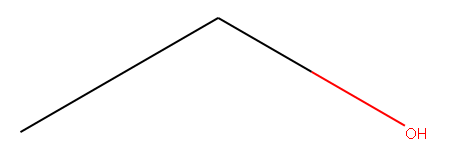

In [2]:
Chem.MolFromSmiles('OCC')

In [3]:
Chem.MolToSmiles(Chem.MolFromSmiles('OCC'))

'CCO'

In [4]:
Chem.MolToSmiles(Chem.MolFromSmiles('C-C-O'))

'CCO'

unique SMILES 로 출력된다.

### 2. Specification Rules
SMILES는 공백이 없는 문자열로 이루어진다. 수소 원자는 표기에 생략될 수도 포함될 수도 있다. 방향족 구조는 직접 나타내거나 케쿨레 형태로 나타낼 수 있다.<br>
5가지 일반적인 SMILES 인코딩 규칙이 있다. (**원자, 결합, 가지, 고리, 분리**)
<br>

#### 1) 원자
* 원자는 원소기호를 이용해 표현한다.
* 수소를 가지지 않는 원자는 [원소기호]로 나타낸다.
* 'organic subset', B, C, N, O, P, S, F, Cl, Br, I 는 [] 없이 쓰이기도 한다. ( 결합된 수소 수가 결합의 원자가와 일치할 때)

SMILES | name | .
------------ | ------------- | ----------  
C |  methane | (CH4)
P | phosphine | (PH3)
N | ammonia | (NH3)
S | hydrogen sulfide | (H2S)
O | water | (H20)
Cl | hydrochloric acid | (HCl)


* 지방족 탄소는 대문자 'C' 로, 방향족 탄소는 소문자 'c'로 `[]` 안에 표현한다.
* '[', ']'속의 수소와 형식전하는 나타내어야 한다. 결합된 수소 수는 원소기호 H와 숫자로 나타낸다.
* 전하는 `+` 혹은 `-` 로 표시되어야 한다. 명시되어 있지 않으면 전하는 0으로 가정한다. 또한 2가 양이온, 음이온 혹은 그 이상은 숫자를 이용하여 표현할 수 있다.

SMILES | name
------------|------------
[H+]  |proton 
[Fe+2] | iron (II) cation 
[OH-] | hydroxyl anion 
[Fe++] | iron (II) cation 
[OH3+] | hydronium cation 
[NH4+] | ammonium cation 


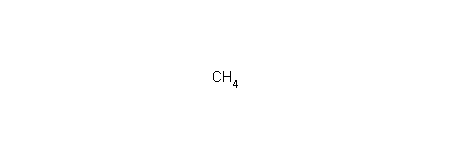

In [5]:
a=Chem.MolFromSmiles('C')
a

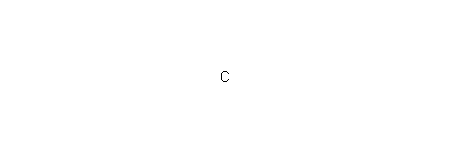

In [6]:
b=Chem.MolFromSmiles('[C]')
b

#### 2) 결합
* 단일결합 `-`
* 이중결합 `=`
* 삼중결합 `#`
* 방향족결합 `:`
<br>
<br>
* 인접 원자는 단일 또는 방향족 결합으로 서로 연결되는 것으로 가정한다. (단일 및 방향족 결합은 대부분 생략할 수 있음)

SMILES | name | .
-------|-------|--------
CC | ethane | (CH3CH3)
C=O | formaldehyde | (CH2O)
C=C | ethene | (CH2=CH2)
O=C=O | carbon dioxide | (CO2)
COC | dimethyl ether | (CH3OCH3)
C#N | hydrogen cyanide | (HCN)
CCO | ethanol | (CH3CH2OH)
[H][H] | molecular hydrogen | (H2)


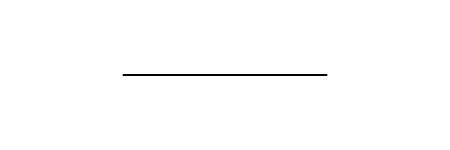

In [7]:
a=Chem.MolFromSmiles('CC')
a

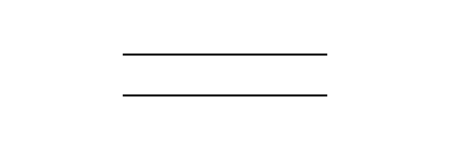

In [8]:
b=Chem.MolFromSmiles('C=C')
b

* 6-hydroxy-1,4-hexadiene - 유효한 SMILES 3가지

Structure|valid SMILES
---------|------------
  | C=CCC=CCO
CH2=CH-CH2-CH=CH-CH2-OH | C=C-C-C=C-C-O
  |OCC=CCC=C

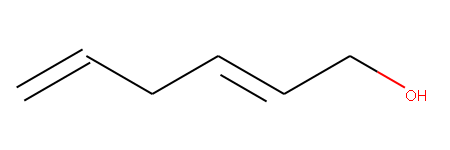

In [9]:
a=Chem.MolFromSmiles('C=CCC=CCO')
a

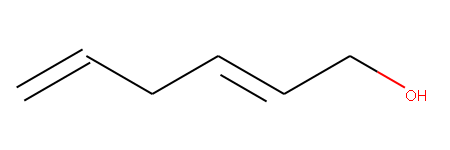

In [10]:
b=Chem.MolFromSmiles('C=C-C-C=C-C-O')
b

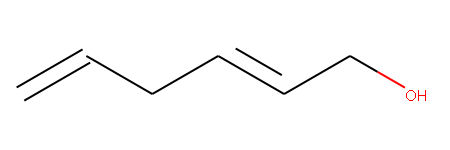

In [11]:
c=Chem.MolFromSmiles('OCC=CCC=C')
c

유효한 SMILES 3가지 모두 같은 구조로 나타난다.

#### 3) 가지
* 가지(치환기)는 소괄호`()`를 이용해서 나타낼 수 있으며 중첩되거나 쌓일 수 있다. 
* 소괄호는 치환기가 결합된 원자 오른쪽에 쓴다.

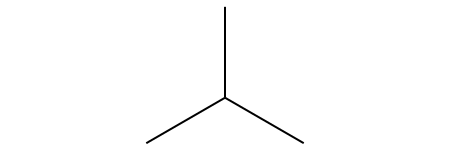

In [12]:
# iso-butane
a=Chem.MolFromSmiles('CC(C)C')
a

<img src="https://raw.githubusercontent.com/asd93/a/master/c/FP/p/그림1.PNG" width="700" height="300">

#### 4) 고리
* 고리 구조는 고리에서 하나의 결합을 깨는 것으로 표시한다.
<img src="https://raw.githubusercontent.com/asd93/a/master/c/FP/p/그림2.PNG" width="500" height="250">

* 결합을 끊은 원자 바로 오른쪽에 숫자를 표시해 고리를 나타낸다. ( (a)와 (b) 같은 분자 )
<img src="https://raw.githubusercontent.com/asd93/a/master/c/FP/p/그림3.PNG" width="500" height="250">
* SMILES for cubane : **C12C3C4C1C5C4C3C25**
<img src="https://raw.githubusercontent.com/asd93/a/master/c/FP/p/그림4.PNG" width="500" height="250">

#### 5) 분리
* 분리된 분자들은 `.` 을 사용해서 나누어진다.<br>
* 이온 또는 리간드 연결 순서는 임의적이다.<br>
> 리간드 : 착물 중에서 중심 원자를 둘러싸고 배위결합하고 있는 이온 또는 분자
* 전체 알짜 전하를 0으로 가질 필요가 없다.

<img src="https://raw.githubusercontent.com/asd93/a/master/c/FP/p/그림5.PNG" width="600" height="250">

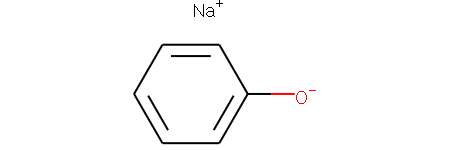

In [15]:
a=Chem.MolFromSmiles('[Na+].[O-]c1ccccc1')
a

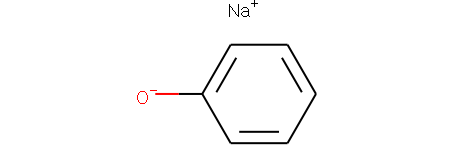

In [16]:
b=Chem.MolFromSmiles('c1cc([O-].[Na+])ccc1')
b

### 3. Isomeric SMILES (이성질체)
여기서는 동위원소, 이중결합 배열, 카이랄성을 나타내기 위한 SMILES 규칙을 설명한다. 이 규칙에 따라 쓰여진 SMILES를 **isomeric SMILES**라 한다.

#### 1) 동위원소
* [원자량+원소기호]로 나타낸다.

SMILES | Name
---------|------------
[12C]| carbon-12
[13C]| carbon-13
[C]  | carbon (unspecified mass)
[13CH4] | C-13 methane

#### 2) 이중결합 주위의 구조
* 이성질체에서 결합의 방향성을 `/`와 `\`로 나타낸다. 이것은 원자들 간의 상대적인 위치를 나타낸다.
* 이중결합에서만 의미가 있다.

In [17]:
a=Chem.MolFromSmiles('F/C=C/F')
b=Chem.MolFromSmiles('F/C=C\F')
c=Chem.MolFromSmiles('F\C=C\F')
d=Chem.MolFromSmiles('F\C=C/F')

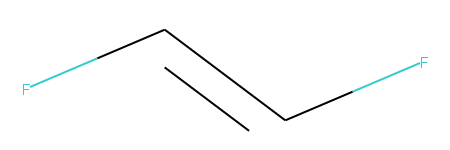

In [19]:
a

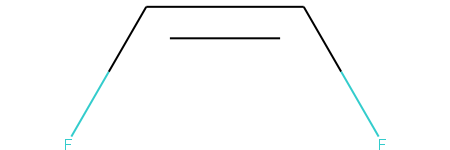

In [20]:
b

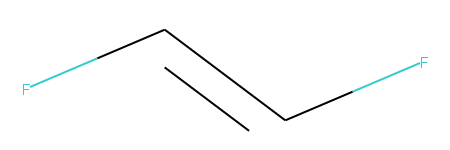

In [21]:
c

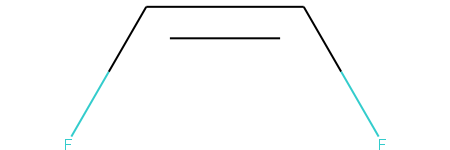

In [22]:
d

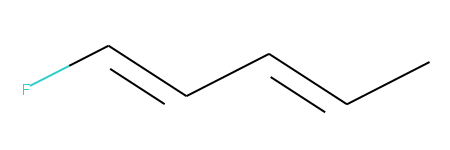

In [23]:
a=Chem.MolFromSmiles('F/C=C/C=CC')
a

F/C=C/C=CC 에서는 일부만 방향성을 나타냈다. (마지막 CC에는 방향 나타내지 않음)

#### 3) Configuration Around Tetrahedral Centers(사면체의 중심의 구조)
* 사면체의 중심은 카이랄 원자의 원자 기호에 카이랄이라는 명시(`@` 또는 `@@`)를 한다.
> **카이랄(chiral)**:자신의 거울상에 포갤 수 없는 분자<br>
카이랄성의 가장 일반적인 원인은 탄소에서 가장 많이 볼 수 있는 정사면체인 원자 때문이다.<br>
네 개의 서로 다른 치환기체가 결합된 탄소 원자는 두 개의 주요 대칭 요소가 없고 그래서 **카이랄 중심(chiral center)**이라 불린다.
* `@`는 이웃하는 치환기들 반시계방향
* `@@`는 이웃하는 치환기들 시계방향
<br><br>
* 치환기 우선순위 결정방법 (1)~(4)
>원자의 번호가 클수록 높은 우선순위 -> 같다면 두 번째 쌍 -> 이중 결합의 경우 결합과 같은 수만큼의 '가상'의 원자들의 단일 결합으로 취급
* 가장 낮은 우선순위(4)를 갖는 치환기를 나로부터 가장 멀리 위치하도록 배치
* 나머지 세 개의 치환기들을 (1)부터 (3) 순서대로 읽었을 때,<br> 시계방향으로 읽혀지면 배열을 R(`@@`) 반시계 방향이라면 S(`@`)로 배정 

In [24]:
m = Chem.MolFromSmiles('N[C@](C)(F)C(=O)O')
m.HasSubstructMatch(Chem.MolFromSmiles('F[C@](N)(C)C(=O)O'),useChirality=True)
# 구조가 같은지 확인을 위한 함수
# useChirality=True : 입체 및 카이랄성 일치도 확인

True

In [25]:
m.HasSubstructMatch(Chem.MolFromSmiles('F[C@@](C)(N)C(=O)O'),useChirality=True)

True

In [26]:
m.HasSubstructMatch(Chem.MolFromSmiles('OC(=O)[C@@](N)(C)F'),useChirality=True)

True

In [27]:
Chiral1 = Chem.MolFromSmiles('N[C@](C)(F)C(=O)O')
Chiral2 = Chem.MolFromSmiles('N[C@@](F)(C)C(=O)O')

In [28]:
Chem.MolToSmiles(Chiral1)

'C[C@@](N)(F)C(=O)O'

In [29]:
Chem.MolToSmiles(Chiral2)

'C[C@@](N)(F)C(=O)O'

### 4. Aromaticity (방향족)
분자의 대칭성을 특징짓기 위해서 SMILES 같은 시스템에서 명확한 명명법을 생성할 수 있어야한다. <br>
정확한 방향족 판단 알고리즘이 있는 경우에, 사용자가 지방족 구조를 입력하고 싶을때 방향족 구조식으로 입력할 필요가 없다.<br>
원하는 화합물을 짧게 명시할 수 있다.<br>
SMILES는 Hueckel 규칙의 확장된 버전을 사용하여 방향족 분자와 이온을 식별한다.

* Hueckel's Rule
> 1.방향족 분자는 고리를 가져야한다.<br>
2.고리의 모든 원자는 같은 평면에 있어야한다.<br>
3.고리의 모든 원자는 fully conjugated 이어야한다.(모든 원자가 p 오비탈을 가진다.)<br>
4.분자는 (4n+2)개의  전자를 가진다. ( n은 0 보다 크거나 같은 정수 ) <br>
    (4번만 만족하지 않는 화합물을 **antiaromatic** 이라고 한다.)

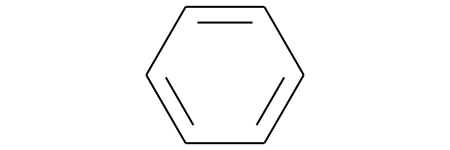

In [31]:
a=Chem.MolFromSmiles('c1ccccc1') 
a

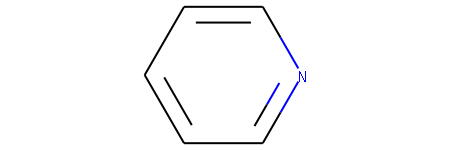

In [32]:
a=Chem.MolFromSmiles('n1ccccc1')
a

### 5.  반응식
* 반응식을 표현할 때는 `>`와 앞서 배운 규칙으로 분자식을 넣어주어 표현한다.
* 어느 위치의 원자가 직접적 변화가 생기는지 알 수 없다. -  Atom Maps 필요
> ex) 어느 c가 반응하는지 알 수 없음 <img src="https://raw.githubusercontent.com/asd93/a/master/c/FP/p/그림6.PNG
" width="500" height="250">

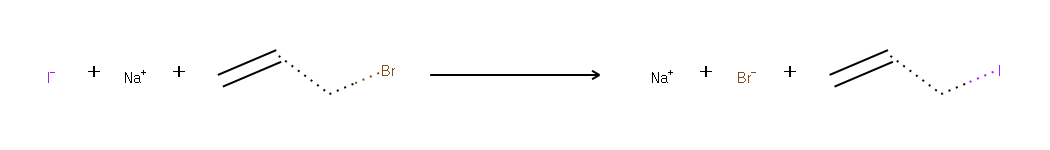

In [34]:
rxn=AllChem.ReactionFromSmarts('[I-].[Na+].C=CCBr>>[Na+].[Br-].C=CCI')
rxn

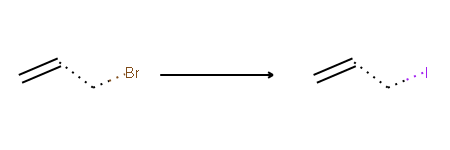

In [35]:
rxn = AllChem.ReactionFromSmarts('C=CCBr>>C=CCI')
rxn

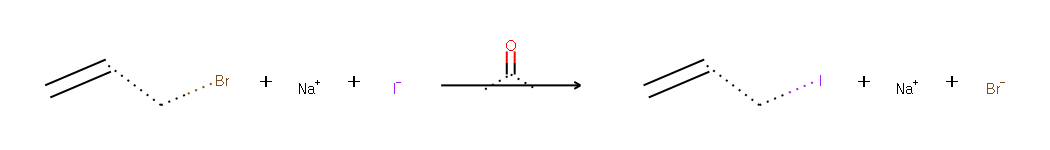

In [36]:
rxn = AllChem.ReactionFromSmarts('C=CCBr.[Na+].[I-] > CC(=O)C > C=CCI.[Na+].[Br-] ')
rxn

Atom map은 컴퓨터가 반응물과 생성물 사이의 같은 원자임을 알 수 있게 표현해주는 방법이다. 
* 원하는 원자의 뒤에 :와 숫자를 이용해 표시 ( [CH3:2] 는 H를 3개 가지고 있는 탄소에 2번을 부여함을 의미한다. )
* 부여한 숫자는 추가적인 성질을 나타내지 않는다. 단지 구분짓기 위함 ( 단, 모든 원자에 같은 숫자를 부여할 경우는 제외. )

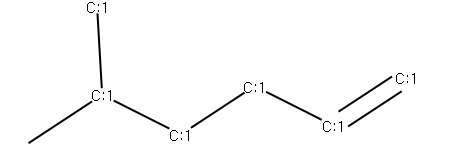

In [37]:
a=AllChem.MolFromSmiles('[CH2:1]=[CH:1][CH2:1][CH2:1][C:1](C)[CH2:1]')
a

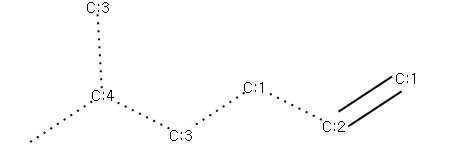

In [38]:
a=AllChem.MolFromSmarts('[CH2:1]=[CH:2][CH2:1][CH2:3][C:4](C)[CH2:3]')
a

반응에 대한 정보가 부족한 경우 입력하면 안된다. 확실한 정보에 대해서만 부분적으로 mapping 한다.<br>
모든 원자에 같은 방법으로 mapping 할 수 있다.<br>
Atom Map은 unique SMILES에서 나타나지 않는다. 